In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

# ignore certain warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
# set seaborn defaults
sns.set()

%config InlineBackend.figure_format = 'png' #set 'png' here when working in notebook
%matplotlib inline

# identify data sets
trainData = 'Downloads/houseprices/train.csv'
testData = 'Downloads/houseprices/test.csv'

# import data sets
train = pd.read_csv(trainData, header=0)
test = pd.read_csv(testData, header=0)

In [3]:
# combine all data (ignoring Id and SalePrice features)
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# view combined data
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


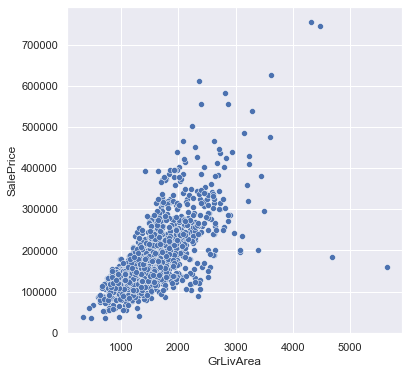

In [7]:
#1. Drop clear outliers
#2. Convert numerical features to strings for features that should really be categorical (e.g. years, months, etc.)
#3. Encode all categorical labels with value between 0 and n_classes-1
#4. Normalize heavily skewed numerical features
#5. Create dummy/indicator features from categorical features
#6. Replace missing values with feature means
#7. Set up matrices for regression models

rcParams['figure.figsize'] = (6.0, 6.0) # define size of figure
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

In [8]:
#2 outliers bottom right
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index).reset_index(drop=True)

# reset combined data set with new training set
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [9]:
#numerical to categorical observation
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [10]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

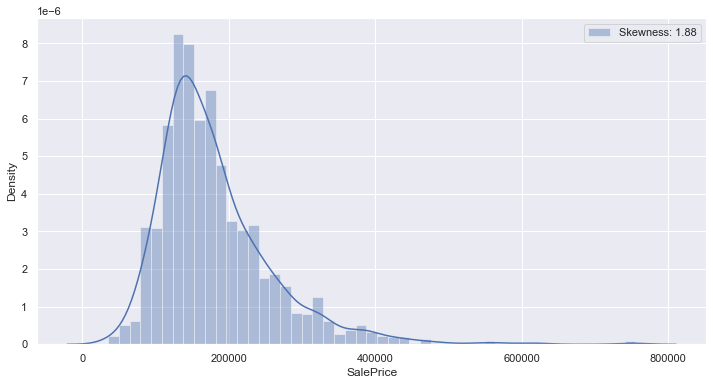

In [11]:
#determine skewness
from scipy.stats import skew

# plot histogram of "SalePrice"
rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure
g = sns.distplot(train["SalePrice"], label="Skewness: %.2f"%(train["SalePrice"].skew()))
g = g.legend(loc="best")
plt.show()

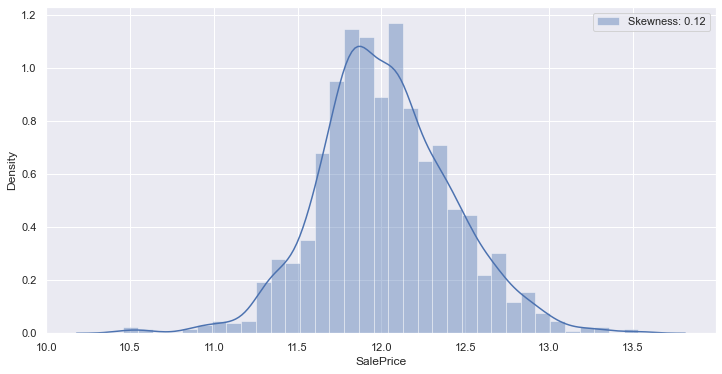

In [12]:
#logtransform
normalizedSalePrice = np.log1p(train["SalePrice"])

# plot histogram of log transformed "SalePrice"
rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure
g = sns.distplot(normalizedSalePrice, label="Skewness: %.2f"%(normalizedSalePrice.skew()))
g = g.legend(loc="best")
plt.show()

In [13]:
# apply log transform to target
train["SalePrice"] = np.log1p(train["SalePrice"])

In [14]:
# determine features that are heavily skewed
def get_skewed_features():
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) # computes "skewness"
    skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
    return skewed_feats.index

In [15]:
#several of the non-target numerical features are also heavily skewed, both rightly and leftly. 
#For each of these, this time we'll choose to use a blanket "yeo-johnson" power transform to attempt to 
#"normalize" each of them, since this tranform "normalizes" both righlty and leftly skewed data. (Here we 
#consider all features with a "skewness" magnitude above 0.75 as "heavily" skewed.)

from sklearn.preprocessing import power_transform

# find heavily skewed numerical features
skewed_feats = get_skewed_features()
print("{} heavily skewed features.".format(len(skewed_feats)))

# apply power transform to all heavily skewed numeric features
all_data[skewed_feats] = power_transform(all_data[skewed_feats], method='yeo-johnson')
print("Applied power transform.")

37 heavily skewed features.
Applied power transform.


In [16]:
# create dummy variables
all_data = pd.get_dummies(all_data)
all_data.shape # we now have 219 features columns compared to original 79

(2917, 219)

In [17]:
#Missing values
all_data.isnull().any().any()

True

In [18]:
# replace NA's with the mean of the feature
all_data = all_data.fillna(all_data.mean())

# check again for any missing values
all_data.isnull().any().any()

False

In [19]:
#model matrices
# create matrices for sklearn
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [20]:
#To analyze how well this model performs for this data set, we will fit the model using the training data, 
#and then estimate the model's average root mean square error (RMSE) using k-fold cross validation. 
#k-fold cross validation.

from sklearn.model_selection import cross_val_score

# determine average root mean square error (RMSE) using k-fold cross validation
def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = cv))
    return rmse

In [21]:
from sklearn.linear_model import LinearRegression

# estimate RMSE for linear regression model
linearModel = LinearRegression()
rmse = rmse_cv(linearModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.12178895200076063, std: 0.007504156380649159


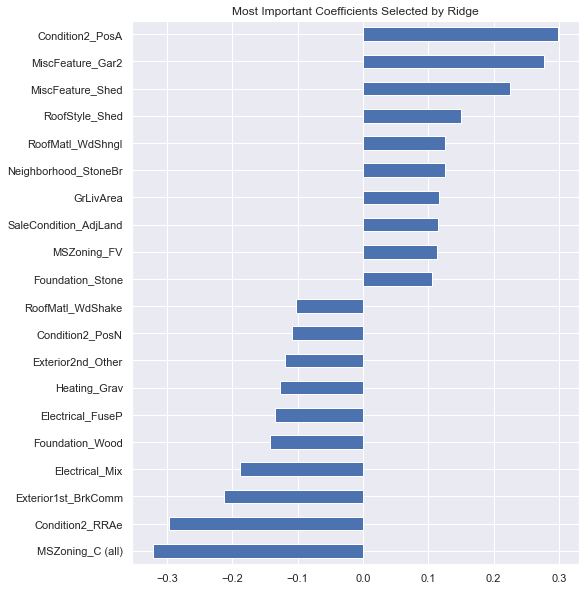

In [22]:
# fit linear model
#If we now fit this model, we can also look at the largest magnitude coefficient values produced. We'll later 
#compare these against those produced by our regularization models.

linearModel.fit(X_train, y)

# get largest magnitude coefficients
coef = pd.Series(linearModel.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # define size of figure
imp_coef.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Ridge")
plt.show()

#Note we don't see any really high coefficient values chosen here because we did a fairly good job preprocessing our data. 
#Had we not removed outliers and normalized the skewed numerical features for example, there would have been higher variance 
#and a high chance of the model picking some noticably high coefficient values in comparison to these. 

In [23]:
#For ridge regression (L2), this regularization term is the sum of the squared coefficients 
#times a non-negative scaling factor lambda (or alpha in our sklearn model).

from sklearn.linear_model import Ridge

# determine RMSE for ridge regression model with alpha = 0.1
ridgeModel = Ridge(alpha = 0.1)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.1204676310011191, std: 0.00774549663680759


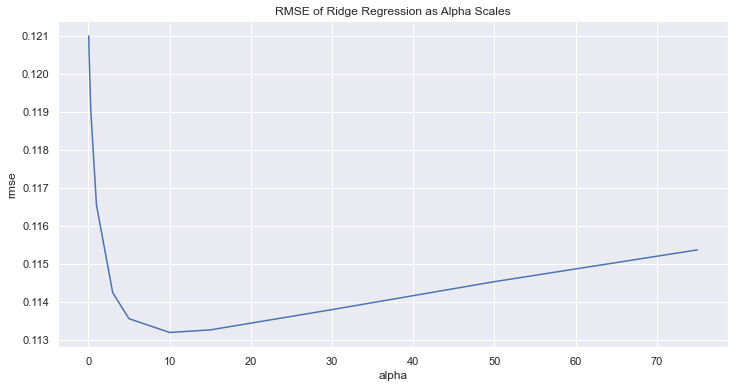

In [24]:
#Let's plot the RMSE as alpha scales to get an idea of how RMSE is affected by the value of alpha.
rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure

# calculate RMSE over several alphas
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

#Notice the U shape. We see from the plot the minimum RMSE occurs somewhere around when alpha is in the 10-15 range.

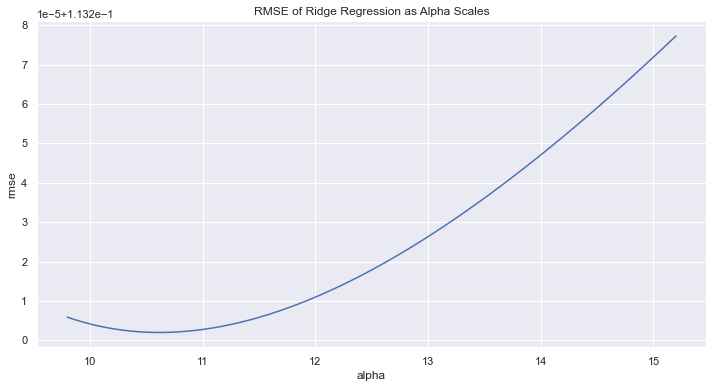

In [25]:
#zoom in
rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure

# calculate RMSE over several alphas
alphas = np.linspace(9.8, 15.2, 541)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [26]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]
print("Optimal ridge alpha: {}".format(optimalRidgeAlpha))

Optimal ridge alpha: 10.620000000000001


In [27]:
# determine RMSE for ridge regression model with optimal alpha
ridgeModel = Ridge(alpha = optimalRidgeAlpha)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.11320200895881341, std: 0.005902692835471621


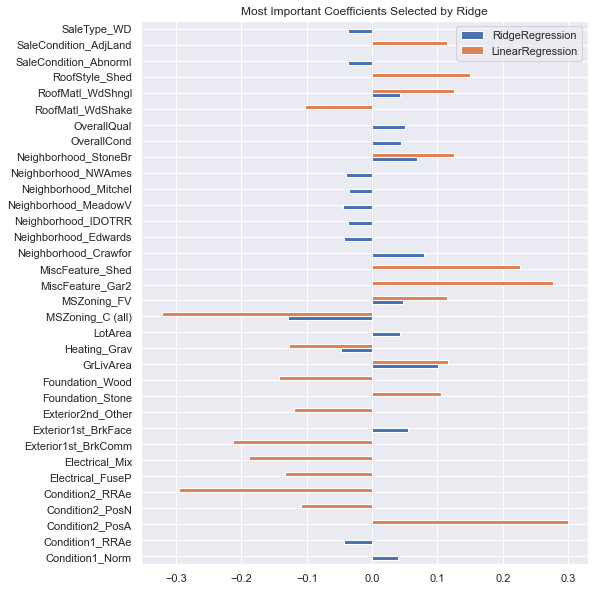

In [28]:
# fit ridge model
ridgeModel.fit(X_train, y)

# get largest magnitude coefficients
ridge_coef = pd.Series(ridgeModel.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # define size of figure
df = pd.DataFrame({ "RidgeRegression" : ridge_imp_coef, "LinearRegression" : imp_coef })
df.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Ridge")
plt.show()

#As expected, the regularization method has noticeably constrained the largest magnitude coefficient values toward 
#zero when compared to those of the orginal linear regression model.

In [29]:
#sum of the squared coefficients
from sklearn.linear_model import Lasso

# determine RMSE for lasso regression model with alpha = 0.1
lassoModel = Lasso(alpha = 0.1)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.20012153270642088, std: 0.005504497512207712


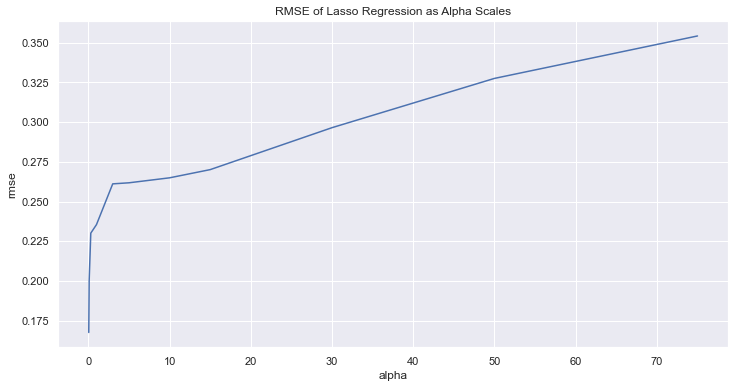

In [30]:
from sklearn.linear_model import Lasso

rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure

# calculate RMSE over several alphas
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

# plot RMSE vs alpha
cv_lasso.plot(title = "RMSE of Lasso Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [31]:
from sklearn.linear_model import LassoCV

# use built in LassoCV function to select best model for data
lassoModel = LassoCV(alphas = np.linspace(0.0002, 0.0022, 21), cv = 5).fit(X_train, y)
lassoModel.alpha_

optimalLassoAlpha = lassoModel.alpha_
print("Optimal lasso alpha: {}".format(optimalLassoAlpha))

Optimal lasso alpha: 0.0004


In [32]:
lassoModel = Lasso(alpha = optimalLassoAlpha)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.11182407763544674, std: 0.006141196071930589


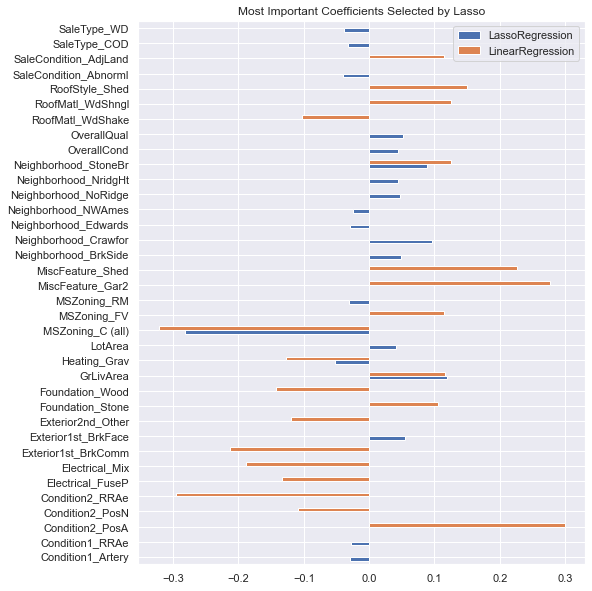

In [33]:
# fit lasso model
lassoModel.fit(X_train, y)

# get largest magnitude coefficients
lasso_coef = pd.Series(lassoModel.coef_, index = X_train.columns)
lasso_imp_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # define size of figure
df = pd.DataFrame({ "LassoRegression" : lasso_imp_coef, "LinearRegression" : imp_coef })
df.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Lasso")
plt.show()

In [34]:
#Note that the Lasso method will actually do feature selection for you - setting coefficients of features it deems 
#unimportant to zero.
lasso_coef = pd.Series(lassoModel.coef_, index = X_train.columns)
print(sum(lasso_coef != 0))
print(sum(lasso_coef == 0))
#It appears this Lasso model selected 107 of the features in this instance, the most 
#important of which are included in the plot above, while zeroing out the other 112. We won't go into any more detail with 
#regards to the specifc features at this time, but know that the selected features are not always the "correct" features, and 
#should be considered, especially when multicollinearity exists within the feature set.
#Multicollinearity is a problem because it undermines the statistical significance of an independent variable. Other 
#things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be 
#statistically significant.

107
112


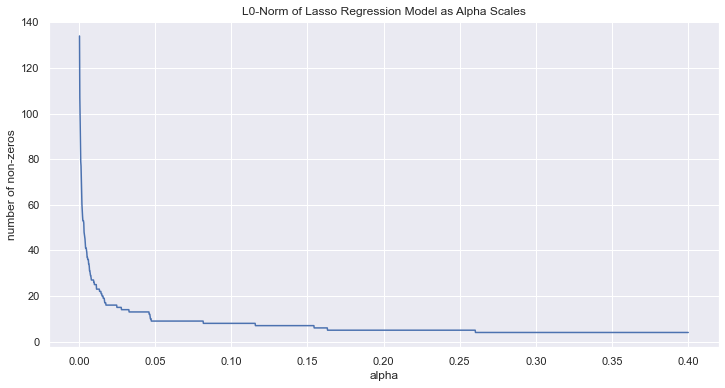

In [35]:
#L0-Norm
# scale alpha
alphas = np.linspace(0.0002, 0.4002, 2001)
nonZeros = []

# for each alpha, fit model to training data
for alpha in alphas:
    lassoModel = Lasso(alpha = alpha).fit(X_train, y)
    coef = pd.Series(lassoModel.coef_, index = X_train.columns)
    # append the number of non-zero coefficients
    nonZeros = np.append(nonZeros, sum(coef != 0))

# plot number of non-zeros (L0-Norm) vs alpha
rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure
lzeroNorm = pd.Series(nonZeros, index = alphas)
lzeroNorm.plot(title = "L0-Norm of Lasso Regression Model as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("number of non-zeros")
plt.show()


In [36]:
lzeroNorm.max()

134.0

In [37]:
lzeroNorm.min()

4.0

In [39]:
#From the plot above, we see as the strength of the regularization parameter alpha grows, the number of selected 
#features drops extremely quick from a max of 134 before eventually leveling off at 4 features when alpha is slightly 
#greater than 0.25. It seems that in general, the higher the strength of alpha, the more restrictive the lasso model 
#becomes with regards to the number of selected features. Keep this in mind when dealing with data sets that contain a large 
#number of irrelevant features.

In [38]:
linearModel = LinearRegression().fit(X_train, y)
lr_submission = pd.DataFrame()
lr_submission['Id'] = test['Id']
lr_submission['SalePrice'] = np.expm1(linearModel.predict(X_test))
lr_submission.to_csv('linear-regression.csv', index=False)

In [40]:
ridgeModel = Ridge(alpha = optimalRidgeAlpha).fit(X_train, y)
ridge_submission = pd.DataFrame()
ridge_submission['Id'] = test['Id']
ridge_submission['SalePrice'] = np.expm1(ridgeModel.predict(X_test))
ridge_submission.to_csv('ridge.csv', index=False)

In [41]:
lassoModel = Lasso(alpha = optimalLassoAlpha).fit(X_train, y)
lasso_submission = pd.DataFrame()
lasso_submission['Id'] = test['Id']
lasso_submission['SalePrice'] = np.expm1(lassoModel.predict(X_test))
lasso_submission.to_csv('lasso.csv', index=False)